<h1>Evan Lin(122367736) Artificial Intelligence Assignment</h1>
<h1>Sri Lanka Vehicle Dataset</h1>

In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
import pandas as pd
import numpy as np

from pandas.plotting import scatter_matrix
from seaborn import scatterplot, heatmap

from sklearn.model_selection import train_test_split

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

from sklearn.preprocessing import OneHotEncoder

from sklearn.base import BaseEstimator, TransformerMixin

from sklearn.linear_model import Ridge
from sklearn.neighbors import KNeighborsRegressor

from sklearn.model_selection import ShuffleSplit, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_validate

from sklearn.metrics import mean_absolute_error
from joblib import dump

In [4]:
import os
if 'google.colab' in str(get_ipython()):
  from google.colab import drive
  drive.mount('/content/drive')
  base_dir = "./drive/My Drive/Colab Notebooks/" # You may need to change this, depending on where your notebooks are on Google Drive
else:
  base_dir = "." # The dimensions

<h1>Objectives</h1>
<ul>
    <li>Find the best model for vehicles sold in Sri Lanka</li>

</ul>

<h1>Dataset Acquisition & Dataset Cleaning</h1>
<p>The following dataset is provided by Prof. Derek Bridge from UCC</p>
<p>We will be taking a deeper look into the dataset and perform analysis and cleaning that will be necessary</p>

In [5]:
# Use pandas to read the CSV file into a DataFrame
df = pd.read_csv(os.path.join(base_dir, "../datasets/dataset_vehicles.csv"))

# Shuffle the dataset
df = df.sample(frac=1, random_state=2)
df.reset_index(drop=True, inplace=True)

In [6]:
# The dimensions
df.shape

(18938, 19)

In [7]:
# Shows all features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18938 entries, 0 to 18937
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Title           18938 non-null  object
 1   Sub_title       18938 non-null  object
 2   Price           18938 non-null  object
 3   Brand           18938 non-null  object
 4   Model           18938 non-null  object
 5   Edition         13908 non-null  object
 6   Year            18938 non-null  int64 
 7   Condition       18938 non-null  object
 8   Transmission    18938 non-null  object
 9   Body            17043 non-null  object
 10  Fuel            18938 non-null  object
 11  Capacity        18938 non-null  object
 12  Mileage         18938 non-null  object
 13  Location        18938 non-null  object
 14  Description     18938 non-null  object
 15  Post_URL        18938 non-null  object
 16  Seller_name     18938 non-null  object
 17  Seller_type     18938 non-null  object
 18  publis

In [8]:
df.head()

,Title,Sub_title,Price,Brand,Model,Edition,Year,Condition,Transmission,Body,Fuel,Capacity,Mileage,Location,Description,Post_URL,Seller_name,Seller_type,published_date
0,Honda Fit Shuttle Full Option 2015 for sale,"Posted on 30 May 2:39 pm, Alutgama, Kalutara","Rs 5,600,000",Honda,Fit Shuttle,Full Option,2015,Used,Automatic,Station wagon,Hybrid,"1,490 cc","107,222 km","Alutgama, Kalutara","HONDA FIT SHUTTLE GP7Rs. 5,600,000/= (Negotiab...",https://ikman.lk/en/ad/honda-fit-shuttle-full-...,kasun,Premium-Member,2021-05-30 14:39:00
1,Kia Sorento 1 to 12 tan premium 2011 for sale,"Posted on 18 Jun 4:01 pm, Horana, Kalutara","Rs 9,800,000",Kia,Sorento,1 to 12 tan premium,2011,Used,Automatic,SUV / 4x4,Diesel,"2,200 cc","114,586 km","Horana, Kalutara",sorento tan primium 1 -12 option engineer used...,https://ikman.lk/en/ad/kia-sorento-1-to-12-tan...,Thilina Chamara,Premium-Member,2021-06-18 16:01:00
2,Suzuki Estilo Zen 2010 for sale,"Posted on 17 Mar 3:19 pm, Kuliyapitiya, Kurune...","Rs 2,175,000",Suzuki,Estilo,Zen Estilo,2010,Used,Manual,Hatchback,Petrol,"1,000 cc","134,000 km","Kuliyapitiya, Kurunegala",New Tyres... New Battery ...Power Shutters..Po...,https://ikman.lk/en/ad/suzuki-estilo-zen-2010-...,Malith Welandage,Premium-Member,2021-03-17 15:19:00
3,Micro MX 7 Mark 2 2013 for sale,"Posted on 24 Jul 5:40 pm, Kottawa, Colombo","Rs 2,350,000",Micro,MX 7,Mark 2,2013,Used,Manual,Saloon,Petrol,"1,500 cc","45,000 km","Kottawa, Colombo",Motor CarRegistered on 2013 December First Owner,https://ikman.lk/en/ad/micro-mx-7-mark-2-2013-...,Ravi Hettiarachchi,Premium-Member,2021-07-24 17:40:00
4,Toyota Harrier LEXUS 2002 for sale,"Posted on 23 Jul 8:32 pm, Negombo, Gampaha","Rs 5,390,000",Toyota,Harrier,LEXUS,2002,Used,Automatic,SUV / 4x4,Petrol,"2,000 cc","170,000 km","Negombo, Gampaha",20023RD OWNERTOYOTA COMPANY MAINTAIN LEATHER E...,https://ikman.lk/en/ad/toyota-harrier-lexus-20...,NIROSHAN MOTOR TRADERS,Premium-Member,2021-07-23 20:32:00


In [9]:
# Summary statistics
df.describe(include="all")

,Title,Sub_title,Price,Brand,Model,Edition,Year,Condition,Transmission,Body,Fuel,Capacity,Mileage,Location,Description,Post_URL,Seller_name,Seller_type,published_date
count,18938,18938,18938,18938,18938,13908,18938.000000,18938,18938,17043,18938,18938,18938,18938,18938,18938,18938,18938,18938
unique,10329,17014,1831,57,516,6336,NaN,3,4,7,6,432,3850,198,17075,17911,6103,1,15060
top,Suzuki Alto 2015 for sale,"Posted on 03 Mar 11:21 am, Colombo 3, Colombo","Rs 650,000",Toyota,Alto,G Grade,NaN,Used,Automatic,Hatchback,Petrol,"1,500 cc","100,000 km","Kohuwala, Colombo",* Leasing can be arranged with your requiremen...,https://ikman.lk/en/ad/daihatsu-mira-es-led-fa...,LB Finance PLC,Premium-Member,2021-03-03 11:21:00
freq,184,63,92,5762,962,172,NaN,17991,11412,6712,13823,3861,450,1333,151,4,512,18938,69
mean,NaN,NaN,NaN,NaN,NaN,NaN,2007.718344,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,11.640139,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,1927.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2003.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,2012.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,2016.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
features = ["Title","Sub_title", "Price", "Brand", "Model", "Edition", "Year",
            "Condition", "Transmission", "Body", "Fuel", "Capacity", "Mileage", 
            "Location", "Description", "Post_URL", "Seller_name", "Seller_type", "published_date"]

numeric_features = ["Price", "Mileage", "Year", "Capacity"]
nominal_features = ["Title","Sub_title", "Brand", "Model", "Edition", "Fuel",
            "Condition", "Transmission", "Body", "Location", "Description", "Post_URL", "Seller_name", "Seller_type", "published_date"]

In [11]:
# Looking into all values of nominal values
for feature in nominal_features:
    print(feature, df[feature].unique())

Title ['Honda Fit Shuttle Full Option 2015 for sale'
 'Kia Sorento 1 to 12 tan premium 2011 for sale'
 'Suzuki Estilo Zen 2010 for sale' ...
 'Toyota Land Cruiser Prado Face Lift 2015 2010 for sale'
 'Datsun Redi Go Used 2016 for sale' 'Nissan March Beatle 2002 for sale']
Sub_title ['Posted on 30 May 2:39 pm, Alutgama, Kalutara'
 'Posted on 18 Jun 4:01 pm, Horana, Kalutara'
 'Posted on 17 Mar 3:19 pm, Kuliyapitiya, Kurunegala' ...
 'Posted on 13 Feb 1:14 pm, Matugama, Kalutara'
 'Posted on 11 Apr 4:55 pm, Delgoda, Gampaha'
 'Posted on 15 Jul 7:31 am, Maharagama, Colombo']
Brand ['Honda' 'Kia' 'Suzuki' 'Micro' 'Toyota' 'Nissan' 'Audi' 'Mitsubishi'
 'Mercedes Benz' 'Peugeot' 'Zotye' 'Daihatsu' 'Hyundai' 'Perodua' 'BMW'
 'Jaguar' 'Land Rover' 'Maruti Suzuki' 'Mazda' 'Lexus' 'Tata' 'MG' 'DFSK'
 'Proton' 'Mini' 'Chery' 'Ford' 'Citroen' 'Isuzu' 'Volkswagen' 'Daewoo'
 'Datsun' 'Volvo' 'Mahindra' 'Chrysler' 'Austin' 'Porsche' 'Other brand'
 'Morris' 'Chevrolet' 'Maruti' 'Renault' 'Ssang Yong' 

<h2>Looking at missing values</h2>
<p>As we show above, it seems like there are missing values in "Body" & "Edition"</p>
<p>Let's have a look at both of these values a bit more in depth</p>

<h3>Missing values in "Body"</h3>

In [12]:
print(df["Body"].unique())

['Station wagon' 'SUV / 4x4' 'Hatchback' 'Saloon' nan 'MPV'
 'CoupÃ©/Sports' 'Convertible']


In [13]:
df[df["Body"].isnull()]

,Title,Sub_title,Price,Brand,Model,Edition,Year,Condition,Transmission,Body,Fuel,Capacity,Mileage,Location,Description,Post_URL,Seller_name,Seller_type,published_date
6,Nissan March 2000 for sale,"Posted on 05 Jul 11:10 am, Kandy, Kandy","Rs 2,260,000",Nissan,March,NaN,2000,Used,Automatic,NaN,Petrol,"1,000 cc","140,000 km","Kandy, Kandy",* Location - Hedeniya Nissn March* YOM 2000* Y...,https://ikman.lk/en/ad/nissan-march-2000-for-s...,Sell Fast | Kandy | Easy Buy Lanka,Premium-Member,2021-07-05 11:10:00
12,Nissan Sunny B 11 1984 for sale,"Posted on 23 Jun 3:13 pm, Elpitiya, Galle","Rs 650,000",Nissan,Sunny,B 11,1984,Used,Manual,NaN,Petrol,"1,300 cc","130,000 km","Elpitiya, Galle",***Quick sale. ...,https://ikman.lk/en/ad/nissan-sunny-b-11-1984-...,randhini,Premium-Member,2021-06-23 15:13:00
26,Suzuki Alto K10 2015 for sale,"Posted on 21 Jun 2:24 pm, Colombo 3, Colombo","Rs 2,895,000",Suzuki,Alto,K10,2015,Used,Automatic,NaN,Petrol,"1,000 cc","63,000 km","Colombo 3, Colombo",* Leasing can be arranged with your requiremen...,https://ikman.lk/en/ad/suzuki-alto-k10-2015-fo...,LB Finance PLC,Premium-Member,2021-06-21 14:24:00
28,Toyota Corolla 1985 for sale,"Posted on 28 Jun 2:42 pm, Akkarepattu, Ampara","Rs 600,000",Toyota,Corolla,NaN,1985,Used,Manual,NaN,Petrol,"1,500 cc","20,875 km","Akkarepattu, Ampara","Toyota CorollaKE 721500cc20,000+ milageGood Co...",https://ikman.lk/en/ad/toyota-corolla-1985-for...,Ramzan,Premium-Member,2021-06-28 14:42:00
55,Honda Vezel Z package 2014 for sale,"Posted on 09 Mar 2:29 pm, Colombo 3, Colombo","Rs 5,350,000",Honda,Vezel,Z package,2014,Used,Automatic,NaN,Petrol,"1,500 cc","81,435 km","Colombo 3, Colombo",* Leasing can be arranged with your requiremen...,https://ikman.lk/en/ad/honda-vezel-z-package-2...,LB Finance PLC,Premium-Member,2021-03-09 14:29:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18884,Tata Xenon 2015 for sale,"Posted on 03 Aug 6:11 pm, Kuliyapitiya, Kurune...","Rs 2,100,000",Tata,Xenon,Xenon,2015,Used,Automatic,NaN,Diesel,"3,000 cc","62,000 km","Kuliyapitiya, Kurunegala",tata cab eka wikineemata atha..,https://ikman.lk/en/ad/tata-2015-for-sale-kuru...,ceylon kumari,Premium-Member,2021-08-03 18:11:00
18887,Nissan Sunny B210 1982 for sale,"Posted on 08 Jul 10:26 am, Kuliyapitiya, Kurun...","Rs 430,000",Nissan,Sunny,B210,1982,Used,Manual,NaN,Petrol,"1,500 cc","250,000 km","Kuliyapitiya, Kurunegala",Nissan | Sunny B210 | 1982 - à¶¸à·à¶§à¶»à· ...,https://ikman.lk/en/ad/nissan-sunny-b210-1982-...,Sell Fast | à¶à·à¶½à·à¶ºà·à¶´à·à¶§à·à¶º ...,Premium-Member,2021-07-08 10:26:00
18919,Austin Mini Cooper 1960 for sale,"Posted on 12 Mar 11:01 am, Kalutara, Kalutara","Rs 1,075,000",Austin,Mini Cooper,NaN,1960,Used,Manual,NaN,Petrol,850 cc,"200,000 km","Kalutara, Kalutara",Good Runing condition New battery,https://ikman.lk/en/ad/austin-mini-cooper-1960...,harshana,Premium-Member,2021-03-12 11:01:00
18921,Micro Panda Cross 2016 for sale,"Posted on 09 Aug 12:51 pm, Panadura, Kalutara","Rs 2,795,000",Micro,Panda Cross,NaN,2016,Used,Manual,NaN,Petrol,"1,300 cc","35,000 km","Panadura, Kalutara",2nd owner Power shutters/ power mirrors Center...,https://ikman.lk/en/ad/micro-panda-cross-2016-...,Mr. Fernando,Premium-Member,2021-08-09 12:51:00


<h3>Deeper look into missing values in "Edition"</h3>

In [14]:
print(df["Edition"].unique())
#print(df["Edition"].unique().tolist())

['Full Option' '1 to 12 tan premium' 'Zen Estilo' ... 'UK Model 2018'
 'Face Lift 2015' 'Beatle']


In [15]:
df[df["Edition"].isnull()]

,Title,Sub_title,Price,Brand,Model,Edition,Year,Condition,Transmission,Body,Fuel,Capacity,Mileage,Location,Description,Post_URL,Seller_name,Seller_type,published_date
6,Nissan March 2000 for sale,"Posted on 05 Jul 11:10 am, Kandy, Kandy","Rs 2,260,000",Nissan,March,NaN,2000,Used,Automatic,NaN,Petrol,"1,000 cc","140,000 km","Kandy, Kandy",* Location - Hedeniya Nissn March* YOM 2000* Y...,https://ikman.lk/en/ad/nissan-march-2000-for-s...,Sell Fast | Kandy | Easy Buy Lanka,Premium-Member,2021-07-05 11:10:00
7,Toyota Axio 2015 for sale,"Posted on 08 Apr 8:48 pm, Kiribathgoda, Gampaha","Rs 5,600,000",Toyota,Axio,NaN,2015,Used,Automatic,Saloon,Petrol,"1,500 cc","132,400 km","Kiribathgoda, Gampaha","First owner ,used by lawyer in mint condition ...",https://ikman.lk/en/ad/toyota-axio-2015-for-sa...,Saranga Pathiranage,Premium-Member,2021-04-08 20:48:00
9,Suzuki Wagon R Stingray 2018 for sale,"Posted on 25 Jul 11:08 am, Colombo 5, Colombo","Rs 5,300,000",Suzuki,Wagon R Stingray,NaN,2018,Used,Automatic,Hatchback,Hybrid,650 cc,"13,800 km","Colombo 5, Colombo","Suzuki Wagon R Stingray Safety 2018Used , exce...",https://ikman.lk/en/ad/suzuki-wagon-r-stingray...,Muffi,Premium-Member,2021-07-25 11:08:00
15,Toyota Vitz 2017 for sale,"Posted on 12 Apr 12:05 pm, Negombo, Gampaha","Rs 5,100,000",Toyota,Vitz,NaN,2017,Used,Automatic,Saloon,Petrol,"1,000 cc","26,000 km","Negombo, Gampaha",Toyota Vitz YOM 2017Pearl white26000 km1000cc1...,https://ikman.lk/en/ad/toyota-vitz-2017-for-sa...,Royanaa Motors,Premium-Member,2021-04-12 12:05:00
19,Suzuki Hustler 2016 for sale,"Posted on 30 Jun 9:37 am, Piliyandala, Colombo","Rs 3,560,000",Suzuki,Hustler,NaN,2016,Used,Automatic,Hatchback,Petrol,660 cc,"70,000 km","Piliyandala, Colombo",Suzuki Hustler 2016=================* Location...,https://ikman.lk/en/ad/suzuki-hustler-2016-for...,Tele Ads,Premium-Member,2021-06-30 09:37:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18907,Suzuki Maruti 2006 for sale,"Posted on 06 Apr 7:27 pm, Akkarepattu, Ampara","Rs 1,360,000",Suzuki,Maruti,NaN,2006,Used,Manual,Hatchback,Petrol,800 cc,"118,000 km","Akkarepattu, Ampara",Central lock Allowheel,https://ikman.lk/en/ad/suzuki-maruti-2006-for-...,sajee,Premium-Member,2021-04-06 19:27:00
18915,Honda Vezel 2018 for sale,"Posted on 09 Apr 10:49 am, Panadura, Kalutara","Rs 8,675,000",Honda,Vezel,NaN,2018,Used,Automatic,Station wagon,Petrol,"1,500 cc","80,000 km","Panadura, Kalutara",AIR CONDITION POWER STEERING POWER MIRROR POWE...,https://ikman.lk/en/ad/honda-vezel-2018-for-sa...,Sellfast | Piliyandala |New City Adz,Premium-Member,2021-04-09 10:49:00
18918,Daihatsu Charmant 1981 for sale,"Posted on 01 Aug 12:53 am, Katunayake, Gampaha","Rs 280,000",Daihatsu,Charmant,NaN,1981,Used,Manual,Saloon,Petrol,"1,200 cc","60,000 km","Katunayake, Gampaha",Running 100%.All light work.New battery.Paint ...,https://ikman.lk/en/ad/daihatsu-charmant-1981-...,K. perera,Premium-Member,2021-08-01 00:53:00
18919,Austin Mini Cooper 1960 for sale,"Posted on 12 Mar 11:01 am, Kalutara, Kalutara","Rs 1,075,000",Austin,Mini Cooper,NaN,1960,Used,Manual,NaN,Petrol,850 cc,"200,000 km","Kalutara, Kalutara",Good Runing condition New battery,https://ikman.lk/en/ad/austin-mini-cooper-1960...,harshana,Premium-Member,2021-03-12 11:01:00


<h2>Data Casting</h2>
<p>Price, Mileage and Capacity seems to be integers that are represented as Objects. We will perform the code below to cast it into int64</p>


In [16]:
for feature in ["Price", "Mileage", "Capacity"]:
    df[feature] = (
        df[feature]
        .astype(str)                                 
        .str.replace(r"[^\d]", "", regex=True)        
        .replace("", np.nan)                          
        .astype("int64")                             
    )

In [17]:
# Confirming out values are casted properly
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18938 entries, 0 to 18937
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Title           18938 non-null  object
 1   Sub_title       18938 non-null  object
 2   Price           18938 non-null  int64 
 3   Brand           18938 non-null  object
 4   Model           18938 non-null  object
 5   Edition         13908 non-null  object
 6   Year            18938 non-null  int64 
 7   Condition       18938 non-null  object
 8   Transmission    18938 non-null  object
 9   Body            17043 non-null  object
 10  Fuel            18938 non-null  object
 11  Capacity        18938 non-null  int64 
 12  Mileage         18938 non-null  int64 
 13  Location        18938 non-null  object
 14  Description     18938 non-null  object
 15  Post_URL        18938 non-null  object
 16  Seller_name     18938 non-null  object
 17  Seller_type     18938 non-null  object
 18  publis

In [18]:
# Showcasing we have casted type object to type int64
df.head()

,Title,Sub_title,Price,Brand,Model,Edition,Year,Condition,Transmission,Body,Fuel,Capacity,Mileage,Location,Description,Post_URL,Seller_name,Seller_type,published_date
0,Honda Fit Shuttle Full Option 2015 for sale,"Posted on 30 May 2:39 pm, Alutgama, Kalutara",5600000,Honda,Fit Shuttle,Full Option,2015,Used,Automatic,Station wagon,Hybrid,1490,107222,"Alutgama, Kalutara","HONDA FIT SHUTTLE GP7Rs. 5,600,000/= (Negotiab...",https://ikman.lk/en/ad/honda-fit-shuttle-full-...,kasun,Premium-Member,2021-05-30 14:39:00
1,Kia Sorento 1 to 12 tan premium 2011 for sale,"Posted on 18 Jun 4:01 pm, Horana, Kalutara",9800000,Kia,Sorento,1 to 12 tan premium,2011,Used,Automatic,SUV / 4x4,Diesel,2200,114586,"Horana, Kalutara",sorento tan primium 1 -12 option engineer used...,https://ikman.lk/en/ad/kia-sorento-1-to-12-tan...,Thilina Chamara,Premium-Member,2021-06-18 16:01:00
2,Suzuki Estilo Zen 2010 for sale,"Posted on 17 Mar 3:19 pm, Kuliyapitiya, Kurune...",2175000,Suzuki,Estilo,Zen Estilo,2010,Used,Manual,Hatchback,Petrol,1000,134000,"Kuliyapitiya, Kurunegala",New Tyres... New Battery ...Power Shutters..Po...,https://ikman.lk/en/ad/suzuki-estilo-zen-2010-...,Malith Welandage,Premium-Member,2021-03-17 15:19:00
3,Micro MX 7 Mark 2 2013 for sale,"Posted on 24 Jul 5:40 pm, Kottawa, Colombo",2350000,Micro,MX 7,Mark 2,2013,Used,Manual,Saloon,Petrol,1500,45000,"Kottawa, Colombo",Motor CarRegistered on 2013 December First Owner,https://ikman.lk/en/ad/micro-mx-7-mark-2-2013-...,Ravi Hettiarachchi,Premium-Member,2021-07-24 17:40:00
4,Toyota Harrier LEXUS 2002 for sale,"Posted on 23 Jul 8:32 pm, Negombo, Gampaha",5390000,Toyota,Harrier,LEXUS,2002,Used,Automatic,SUV / 4x4,Petrol,2000,170000,"Negombo, Gampaha",20023RD OWNERTOYOTA COMPANY MAINTAIN LEATHER E...,https://ikman.lk/en/ad/toyota-harrier-lexus-20...,NIROSHAN MOTOR TRADERS,Premium-Member,2021-07-23 20:32:00


<h2>Comparing numeric features with price</h2>
<p>We will compare numeric features with the price in a 2D array to look for outliers</p>
<p>In the graph below, we see clearly see an extreme price of used cars that are way above the median price of "new condition" cars. This could be seem as a huge outlier or misstyped prices</p>

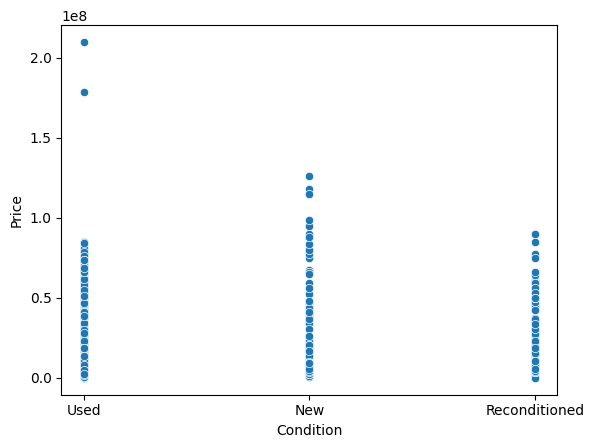

In [19]:
#plot = scatterplot(x="Mileage", y="Price", data=df)
#plot = scatterplot(x="Year", y="Price", data=df)
#plot = scatterplot(x="Capacity", y="Price", data=df)
plot = scatterplot(x="Condition", y="Price", data=df)

<h2>Deeper look into overpriced cars</h2>
<p>There is a re-occuring theme where the prices of cars in SRI Lanka are >= 150million RS</p>
<p>As shown below a used car with high mileog having prices above 150m RS seems kind of insane. We will remove these examples from our dataset. As these cars are used and with relatively high mileage on one of the cars|</p>

In [20]:
df[(df["Price"] >= 150000000)]

,Title,Sub_title,Price,Brand,Model,Edition,Year,Condition,Transmission,Body,Fuel,Capacity,Mileage,Location,Description,Post_URL,Seller_name,Seller_type,published_date
583,Toyota Premio 1st owner 2020 for sale,"Posted on 25 Jul 6:36 am, Nattandiya, Puttalam",179000000,Toyota,Premio,1st owner 2020,2020,Used,Automatic,Saloon,Petrol,1500,18000,"Nattandiya, Puttalam",Toyota Premio G SuperiorManufacture Year 2020E...,https://ikman.lk/en/ad/toyota-premio-1st-owner...,HRN Communications,Premium-Member,2021-07-25 06:36:00
9227,Mitsubishi Montero GLS 2015 for sale,"Posted on 01 Jul 1:38 pm, Nittambuwa, Gampaha",210000000,Mitsubishi,Montero,GLS,2015,Used,Automatic,SUV / 4x4,Diesel,3200,80000,"Nittambuwa, Gampaha","First owner, Leather seat, Electric srat, Rock...",https://ikman.lk/en/ad/mitsubishi-montero-gls-...,Ranaweera Enterprises,Premium-Member,2021-07-01 13:38:00


<p>A used car being more than 150million RS with high mileage seems a bit extreme in our dataset. So we will drop these 2 to clean our dataset</p>

In [21]:
# Delete examples where price are NaN
df.dropna(subset=["Price"], inplace=True)

# Delete examples whose prices are too high
df = (df[(df["Price"] <= 150000000)]).copy()

# Reset the indez
df.reset_index(drop=True, inplace=True)

# Check the invalid data was filtered out
df.shape

(18936, 19)

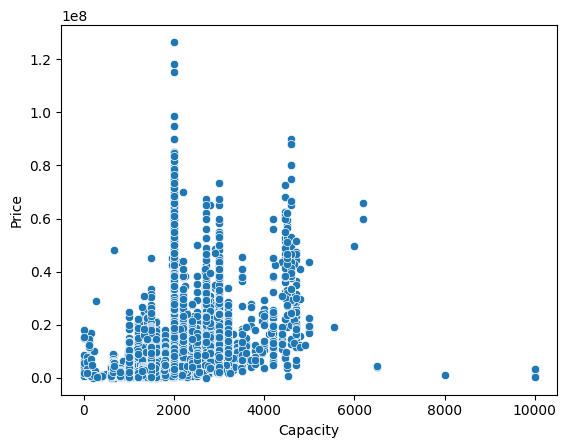

In [22]:
#Another look into our plotted graph
plot = scatterplot(x="Capacity", y="Price", data=df)

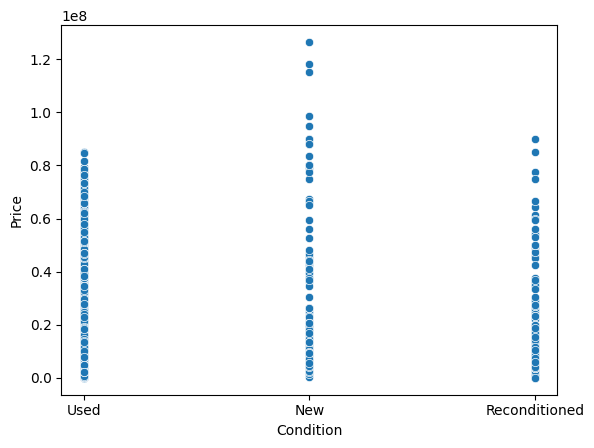

In [23]:
plot = scatterplot(x="Condition", y="Price", data=df)

<h2>Conclusion</h2>
<p>It seems that cars with null values for Body and Edition have all the other features listed in. I have decided to leave those in the dataset.</p>
<p>While cleaning the dataset</p>
<ul>
    <li>The decision was made to only delete rows where the prices are absurdly high</li>
    <li>All numeric values that is as type object has been casted to type int</li>
</ul>
<p>In total we have only deleted 2 examples, while keeping the remaining for dev and test set</p>

<h3>Some remarks</h3>
<p>Personally would like to delete useless features such as title, subtitle, description. However these will be kept for now as we can drop them later in feature engineering abfter getting our first evaluation from the developement set</p>

<h1>Create a Test Set</h1>
<ul>
    <li>Split off a test set. (80%, 20%)</li>
    <li>Split development set into train and validation sets (75%/25%)</li>
</ul>

In [24]:
# Split off the test set: 20% of the dataset.
dev_df, test_df = train_test_split(df, train_size=0.8, random_state=2)

<h1>Dataset Exploration</h1>

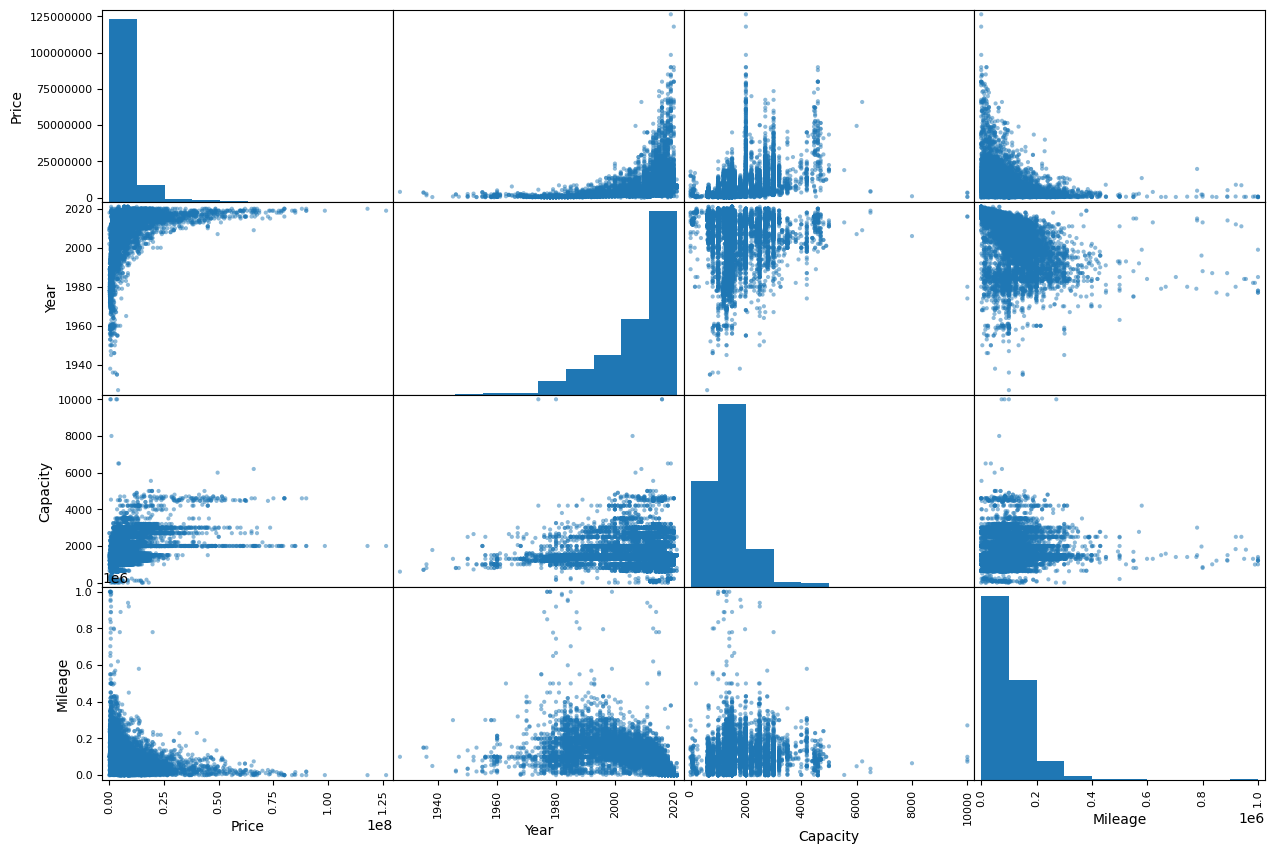

In [25]:
copy_df = dev_df.copy()
m = scatter_matrix(copy_df, figsize=(15, 10))

<Axes: >

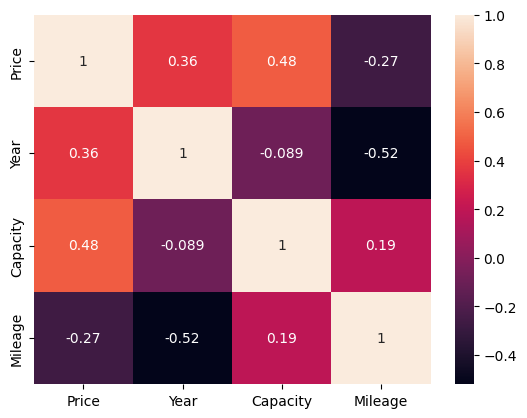

In [26]:
heatmap(copy_df[["Price", "Year", "Capacity", "Mileage"]].corr(), annot=True)

<ul>
    <li>We see that $\mathit{Year}$ and $\mathit{Mileage}$ are fairly strongly correlated
        with each other.  
        <ul>
            <li>Mileage has fairly strong correlation with year</li>
            <li>The longer you have a car, the more likely you will increase the mileage</li>
        </ul>
    </li>
    <li>$\mathit{Mileage}$ and $\mathit{Price}$ are negatively weakly correlated. This could be due to non far distance travel due to the fact that these are cars and not transportation vehicles like trucks</li>
</ul>
<p>With this information we could do the possible <b>feature engineering:</b></p>
<ul>
    <li>Age = Current Year - Year</li>
    <li>Mileage per Year = Mileage / Year</li>
    <li>Price per Capacity = Capacity / Price</li>
</ul>

<Axes: >

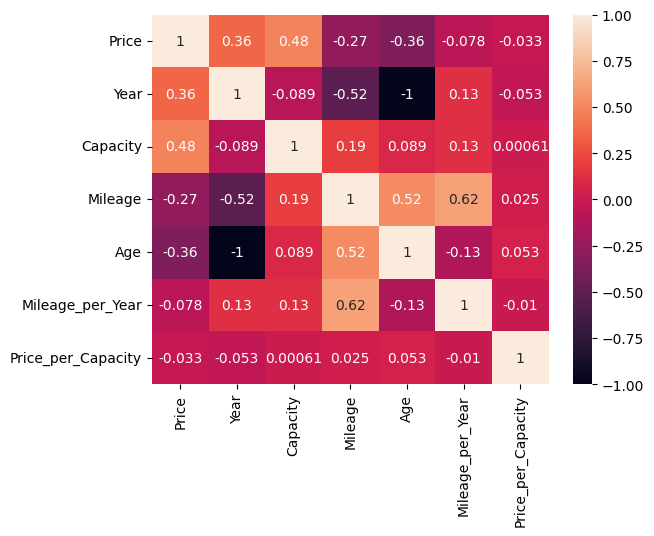

In [27]:
copy_df["Age"] = 2025 - copy_df["Year"]
copy_df["Mileage_per_Year"] = copy_df["Mileage"] / copy_df["Age"].replace(0, 1)
copy_df["Price_per_Capacity"] = copy_df["Capacity"] / copy_df["Price"].replace(0, 1)
heatmap(copy_df[["Price", "Year", "Capacity", "Mileage","Age","Mileage_per_Year","Price_per_Capacity"]].corr(), annot=True)

<p>Mileage_per_year is has little to no correlation to include as a new feature</p>
<p>Price_per_Capacity and Age has weak correlation, maybe we can add this if our data underfits</p>

<h1>Dataset Preparation</h1>
<h2>Creating the preprocessors</h2>
<p>We will use all data as a start to see whether we are overfitting or underfitting to gain a deeper understanding of our dataset</p>
<p>However for our preprocessor, we know that both Body and Edition does not exist. And there contains around 6895 items in our dataset. Which is 1/3 of our dataset. Therefore, using "most_frequent" to assign into NaN data seems obscure. Classifying it as unknown may be better as these usually leads to either lower prices or a bias in high prices.</p>

<h3>Reference</h3>
<p>https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html</p>

In [28]:
preprocessor = ColumnTransformer([
    ("num", Pipeline([
        ("imputer", SimpleImputer(strategy="mean")),
        ("scaler", StandardScaler())
    ]), numeric_features),

    ("nom", Pipeline([
        ("imputer", SimpleImputer(strategy="constant", fill_value="Not Known")),
        ("binarizer", OneHotEncoder(handle_unknown="ignore"))
    ]), nominal_features)
], remainder="drop")

<h1>Model Selection</h1>
<p>For Model Selection we will use KNN since car prices are not linearly related</p>
<p>We can have a look into other Regressors at a later stage and compare</p>

In [29]:
# Extract for Dev and Test Set
dev_X = dev_df[features]
test_X = test_df[features]

# Set Target Value Y
dev_y = dev_df["Price"].values
test_y = test_df["Price"].values

<h3>Holdout</h3>

In [30]:
# Split in 80%/20%
ss = ShuffleSplit(n_splits=1, train_size=0.75, random_state=2)

In [31]:
# Create a pipeline that combines the preprocessor with kNN
knn = Pipeline([
    ("preprocessor", preprocessor),
    ("predictor", KNeighborsRegressor())])

In [32]:
#Testing Hyper-parameters
knn_param_grid = {"predictor__n_neighbors": [6,7,8,9,10]}

knn_gs = GridSearchCV(knn, knn_param_grid, scoring="neg_mean_absolute_error", cv=ss, refit=True)

knn_gs.fit(dev_X, dev_y)

,estimator,Pipeline(step...Regressor())])
,param_grid,"{'predictor__n_neighbors': [6, 7, ...]}"
,scoring,'neg_mean_absolute_error'
,n_jobs,None
,refit,True
,cv,ShuffleSplit(...ain_size=0.75)
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,transformers,"[('num', ...), ('nom', ...)]"


In [33]:
print(knn_gs.best_params_, knn_gs.best_score_)

{'predictor__n_neighbors': 8} -738879.5084499604


In [ ]:
scores = cross_validate(knn_gs, dev_X, dev_y, cv=10, 
                        scoring="neg_mean_absolute_error", return_train_score=True)
print("Training error: ", np.mean(np.abs(scores["train_score"])))
print("Validation error: ", np.mean(np.abs(scores["test_score"])))

<h3>KNN</h3>

In [ ]:
# Create a dictionary of hyperparameters for kNN
knn_param_grid = {"predictor__n_neighbors": [7, 8, 9, 10, 11, 12]}

# Create the grid search object which will find the best hyperparameter values based on validation error
knn_gs = GridSearchCV(knn, knn_param_grid, scoring="neg_mean_absolute_error", cv=10, refit=True)

# Run grid search by calling fit. It will also re-train on train+validation using the best parameters.
knn_gs.fit(dev_X, dev_y)

# Let's see how well we did
knn_gs.best_params_, knn_gs.best_score_

In [ ]:
print(knn_gs.best_params_, knn_gs.best_score_)

In [ ]:
scores = cross_validate(knn_gs, dev_X, dev_y, cv=10, 
                        scoring="neg_mean_absolute_error", return_train_score=True)
print("Training error: ", np.mean(np.abs(scores["train_score"])))
print("Validation error: ", np.mean(np.abs(scores["test_score"])))